In [1]:
# Add the root to sys.path so Python can find the src folder
import sys
import os
sys.path.append(os.path.abspath(".."))

from src import load_csv

# Load the Benin dataset
df_togo = load_csv('togo-dapaong_qc.csv')
df_togo.head()


Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4   
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4   
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [2]:
from src import get_date_range
import pandas as pd
# Call your function
start, end = get_date_range(df_togo)

# Print result
print(f"Benin data range: {start} to {end}")

Benin data range: 2021-10-25 to 2022-10-25


#### loading
>as we already initalize load in 'src/__init__.py' first we call and load a file

In [3]:
from src import   missing_value_report
# Missing data
missing = missing_value_report(df_togo)
print(missing["missing_counts"])
print("Columns with >5% nulls:", missing["high_null_columns"])

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Columns with >5% nulls: ['Comments']


### Missing Value
we can see that there is no missing column **except comment column** which is empty column so better to drop it 

In [4]:
# Drop 'Comments' column if all values are NaN or it's just empty
if 'Comments' in df_togo.columns and df_togo['Comments'].isna().all():
    df_togo.drop(columns='Comments', inplace=True)


In [5]:
from src import summary_statistics

# Summary stats
print(summary_statistics(df_togo))

                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-04-25 12:00:30.000000768     230.555040     151.258469   
min              2021-10-25 00:01:00     -12.700000       0.000000   
25%              2022-01-24 06:00:45      -2.200000       0.000000   
50%              2022-04-25 12:00:30       2.100000       0.000000   
75%              2022-07-25 18:00:15     442.400000     246.400000   
max              2022-10-25 00:00:00    1424.000000    1004.500000   
std                              NaN     322.532347     250.956962   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      116.444352     226.144375     219.568588      27.751788   
min         0.000000       0.000000       0.000000      14.900000   
25%         0.000000       0.000000       0.000000      24.200000   
50%         2.500000    

#### explanation of the above statstics
it is shown that GHI            DNI           and DHI have a -ve value which is unacceptable as the minimum value is 0

In [6]:
irradiance_cols = ['GHI', 'DNI', 'DHI']
neg_counts = (df_togo[irradiance_cols] < 0).sum()
print("Ivalid Negative value counts\n", neg_counts)

Ivalid Negative value counts
 GHI    257385
DNI         0
DHI         0
dtype: int64


c:\Users\ABC\Desktop\10Acadamy\solar_analysis_code\solar-site-analysis\src\visualization.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df[['GHI', 'DNI', 'DHI']].resample('H').mean()


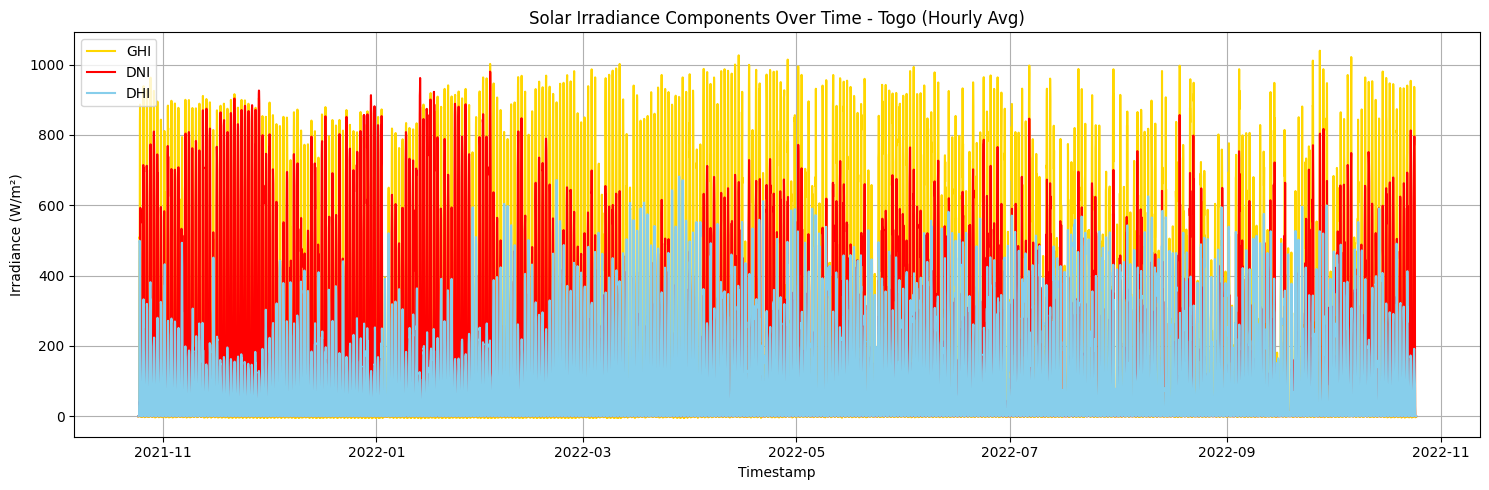

In [7]:
from src.visualization import plot_hourly_irradiance
plot_hourly_irradiance(df_togo, "Togo")


### Negative Irradiance Values Summary

| **Feature** | **# of Negative Values** | **% of Total Rows** |
|-------------|---------------------------|----------------------|
| **GHI**     | 257,385                   | ~49%               |


---

###  Interpretation

Negative values in irradiance data can be caused by:

-  **Nighttime readings**, when solar radiation should naturally be **0**, not negative.
-  **Sensor bias or drift**, where instruments slightly **dip below zero** due to low signal or calibration issues — especially at night.

While this behavior is **not abnormal in raw solar data**, negative irradiance values should be **Cleaned before analysis** or modeling So we do further analysis to know why it happens and by what to replace or clip.
This ensures physical accuracy and avoids misleading statistical summaries or visualizations.


c:\Users\ABC\Desktop\10Acadamy\solar_analysis_code\solar-site-analysis\src\visualization.py:46: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df[[col]].resample('H').mean()


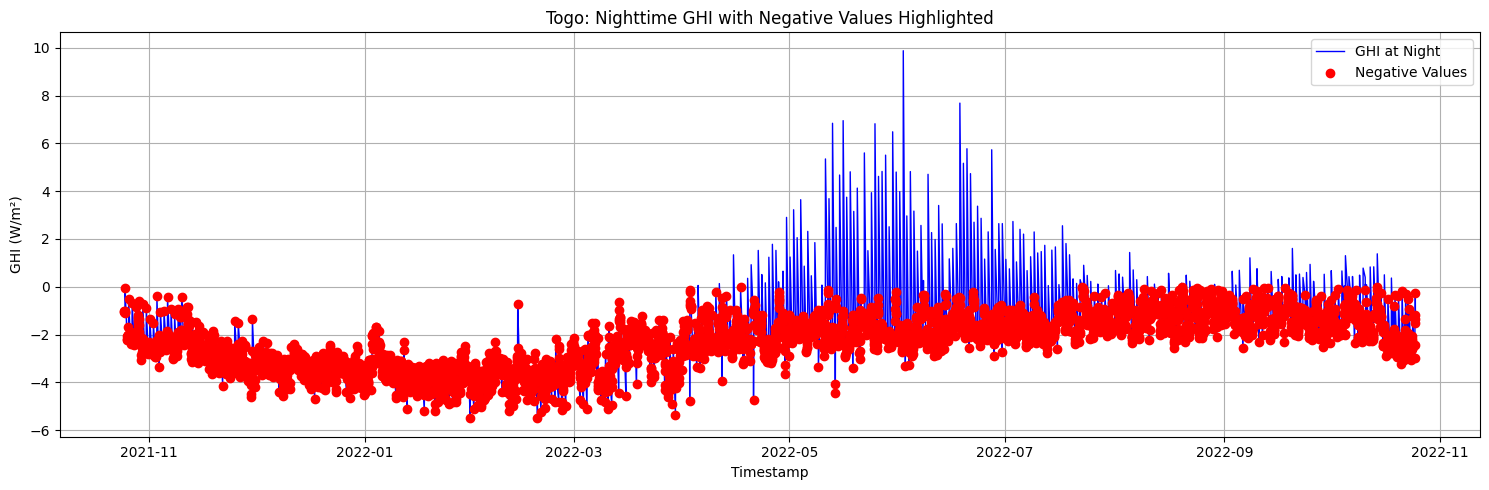

c:\Users\ABC\Desktop\10Acadamy\solar_analysis_code\solar-site-analysis\src\visualization.py:46: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df[[col]].resample('H').mean()


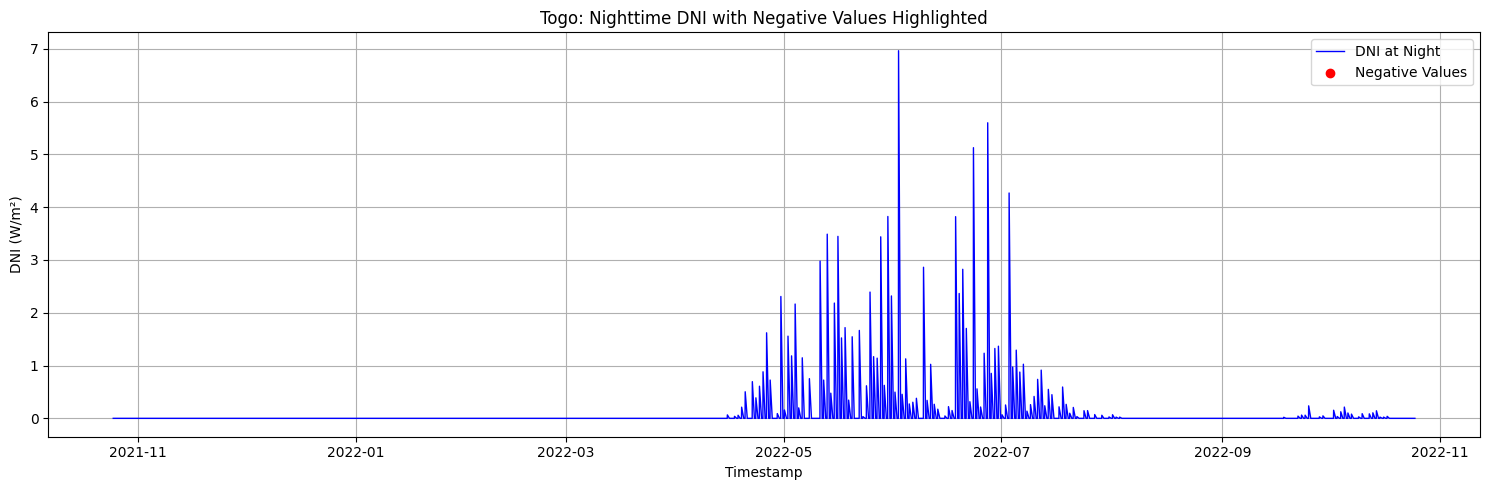

c:\Users\ABC\Desktop\10Acadamy\solar_analysis_code\solar-site-analysis\src\visualization.py:46: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df[[col]].resample('H').mean()


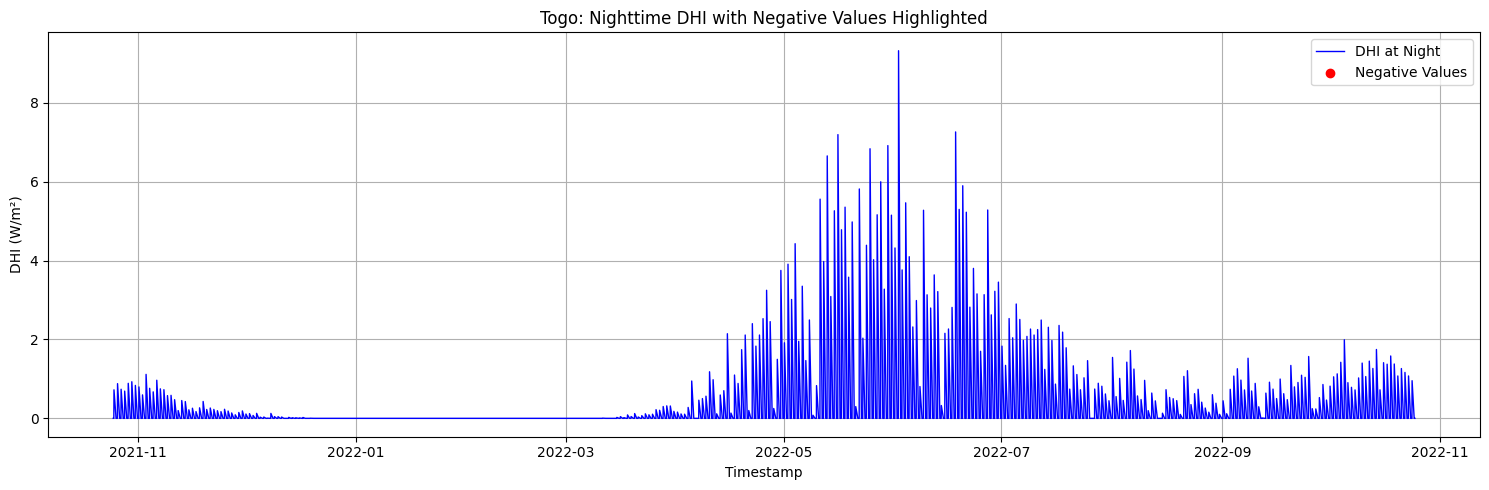

In [8]:
from src.visualization import plot_nighttime_irradiance

plot_nighttime_irradiance(df_togo, "Togo")


c:\Users\ABC\Desktop\10Acadamy\solar_analysis_code\solar-site-analysis\src\visualization.py:83: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df[irradiance_cols].resample('H').mean()


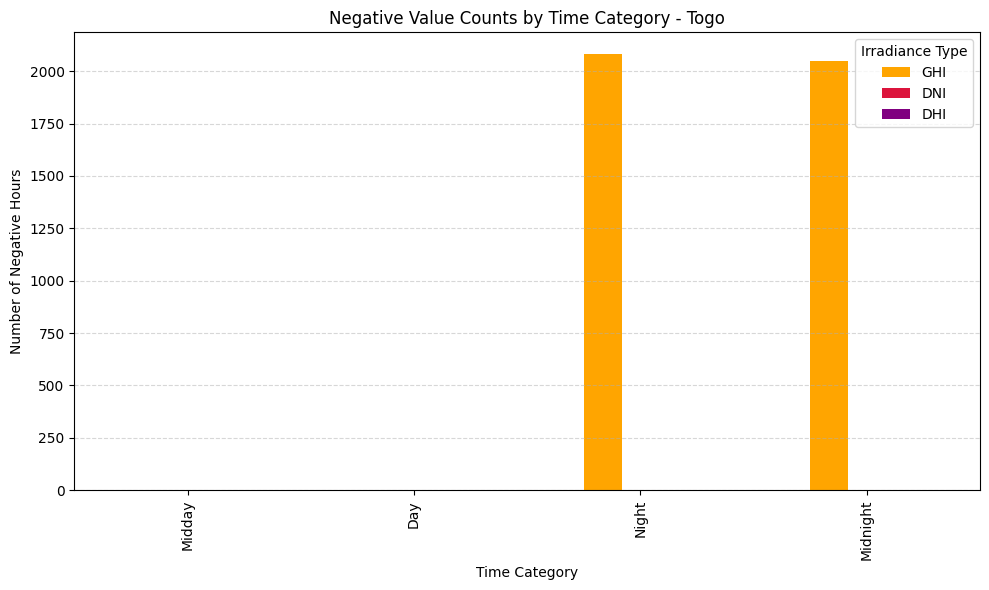

In [9]:
from src.visualization import plot_negative_irradiance_counts_by_time

plot_negative_irradiance_counts_by_time(df_togo, "Togo")


### 🌙 Nighttime Irradiance Values and Data Cleaning

It is clearly shown that the **negative values in GHI** correspond to the **nighttime period**—when the sun is no longer visible and solar radiation should, by physics, be zero.

 Why This Happens
These negative values are not physically meaningful; they likely result from:
- **Sensor bias or drift** at night
- **Baseline miscalibration** of the equipment
- **Electronic noise** during low-light conditions

Since solar irradiance is **energy from sunlight**, it should never be negative. Even on cloudy days, irradiance may be low, but not below zero. At night, it should naturally be **zero**.


As a result, **all negative values in GHI was safely replaced with 0**, aligning with real-world solar physics and making the dataset more reliable for analysis and modeling.

 Why This Matters
Cleaning these values:
- Improves the accuracy of statistical summaries
- Prevents skewing machine learning models in later phases
- Helps identify real solar potential without artificial noise



In [10]:
# Replace all invalid negatives with 0
df_togo[irradiance_cols] = df_togo[irradiance_cols].clip(lower=0)


make all -ve value of **irradiance_cols** to **0** for better analysis by using .clip(replace all values with lower 0 with 0 )

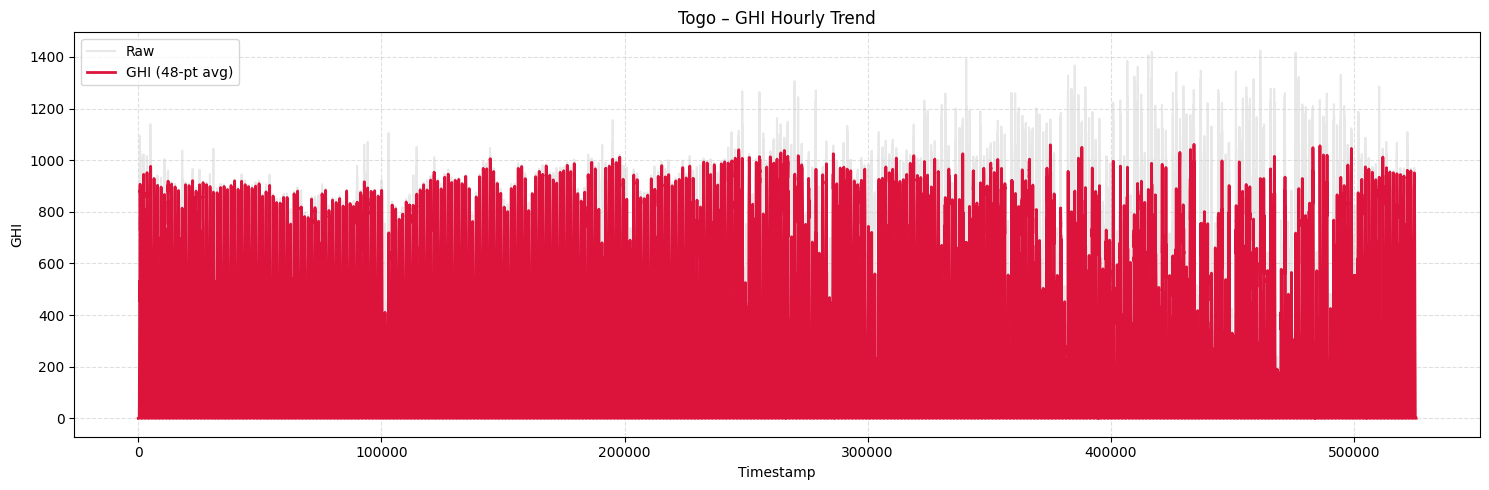

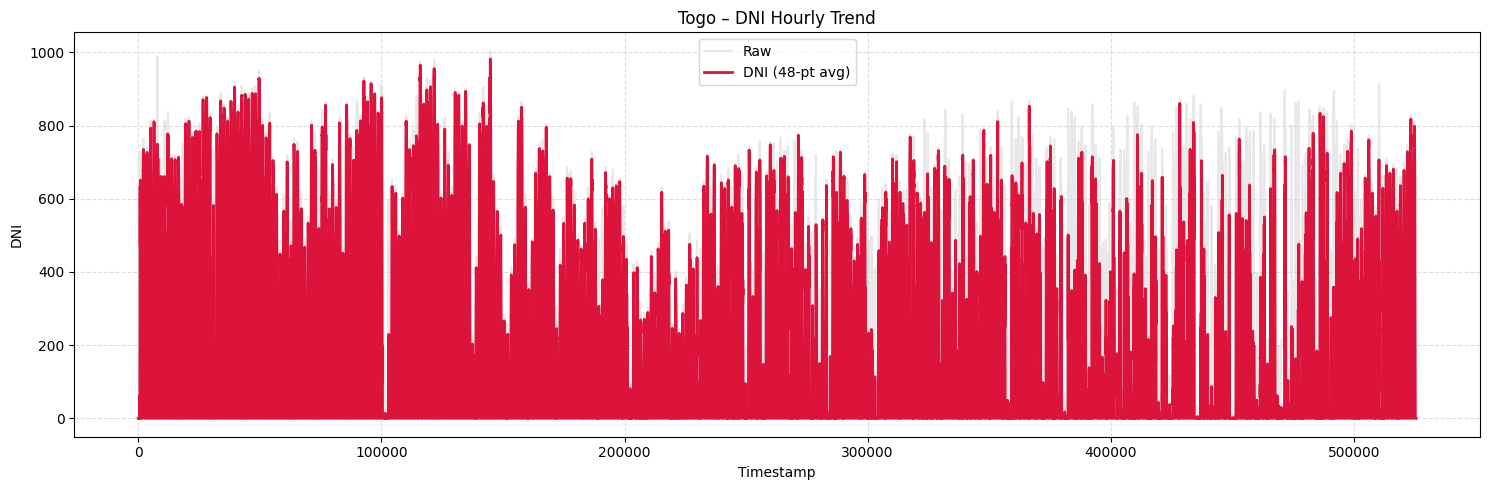

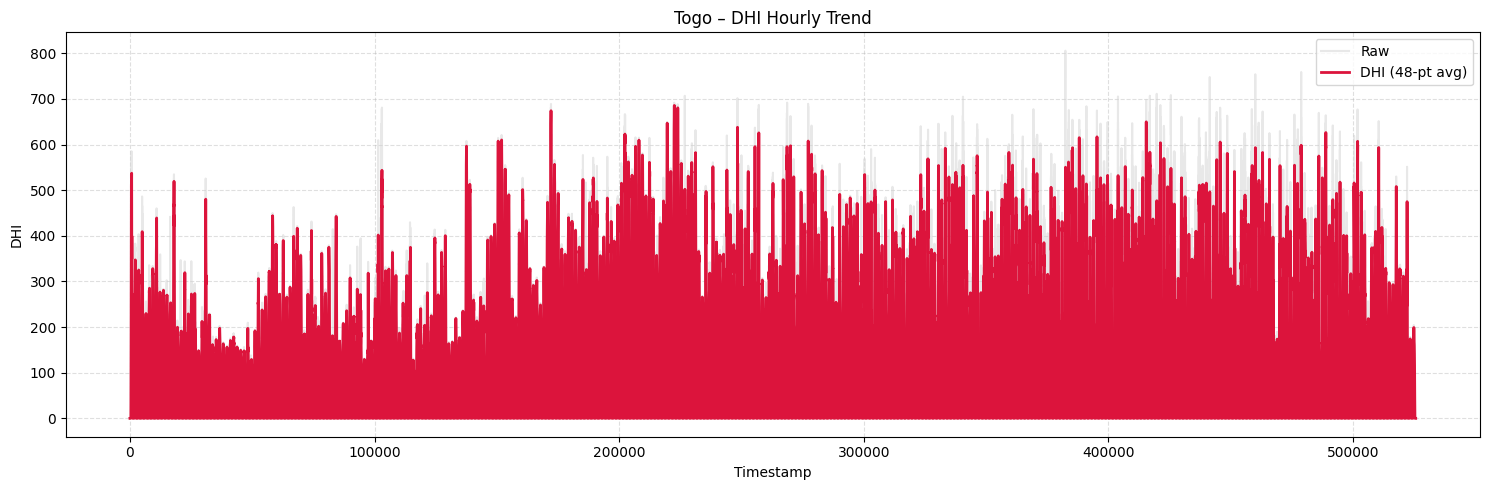

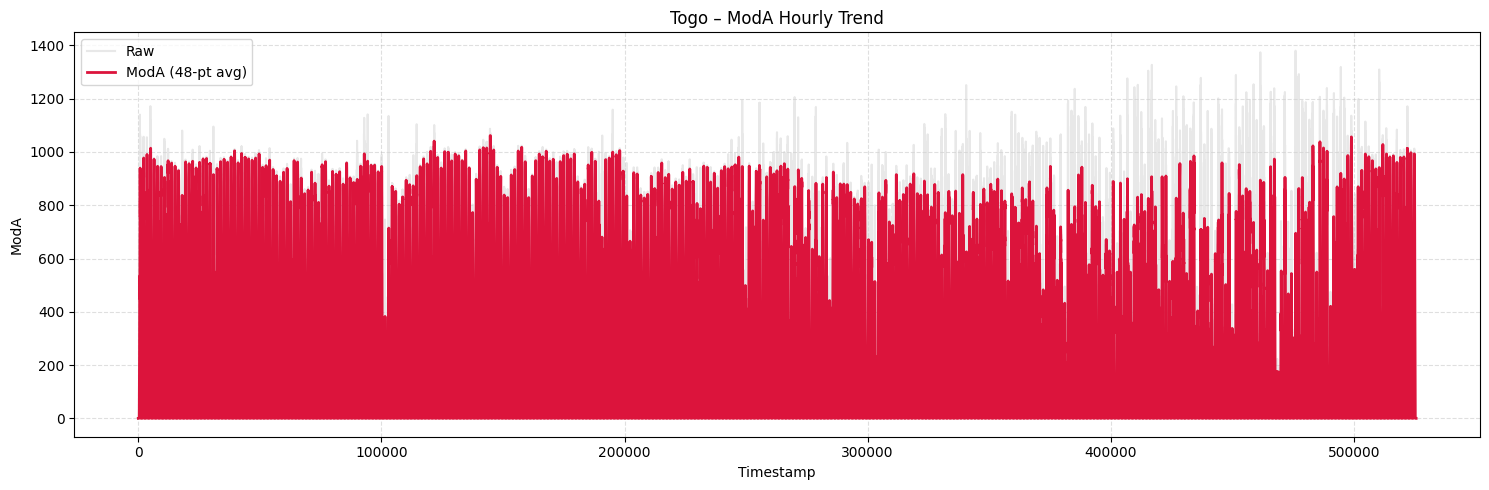

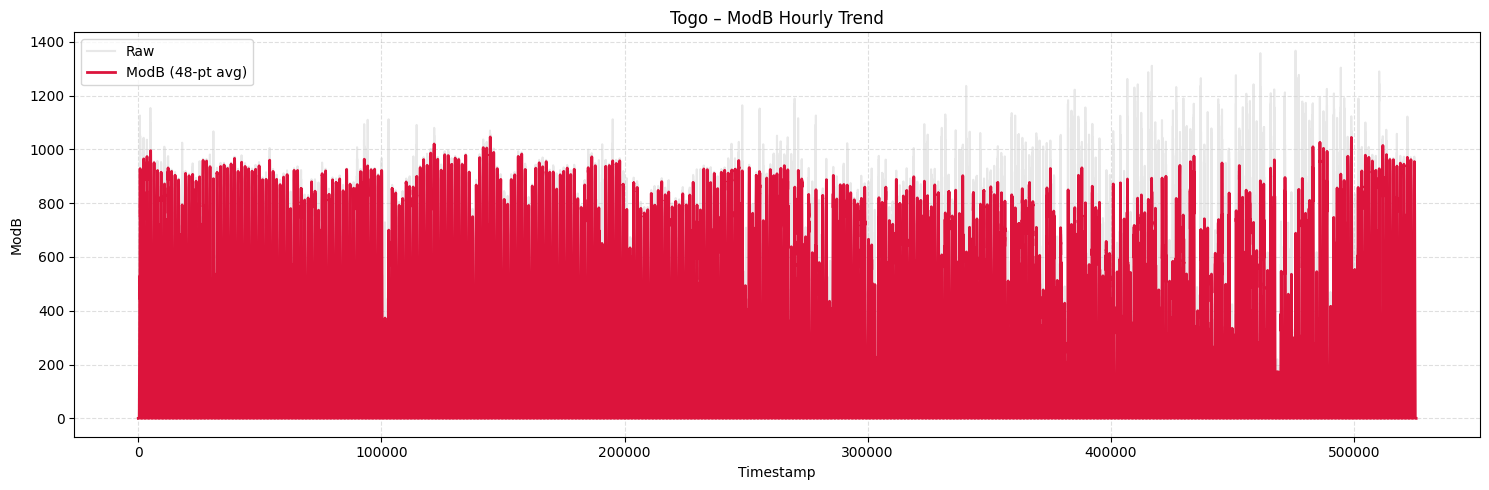

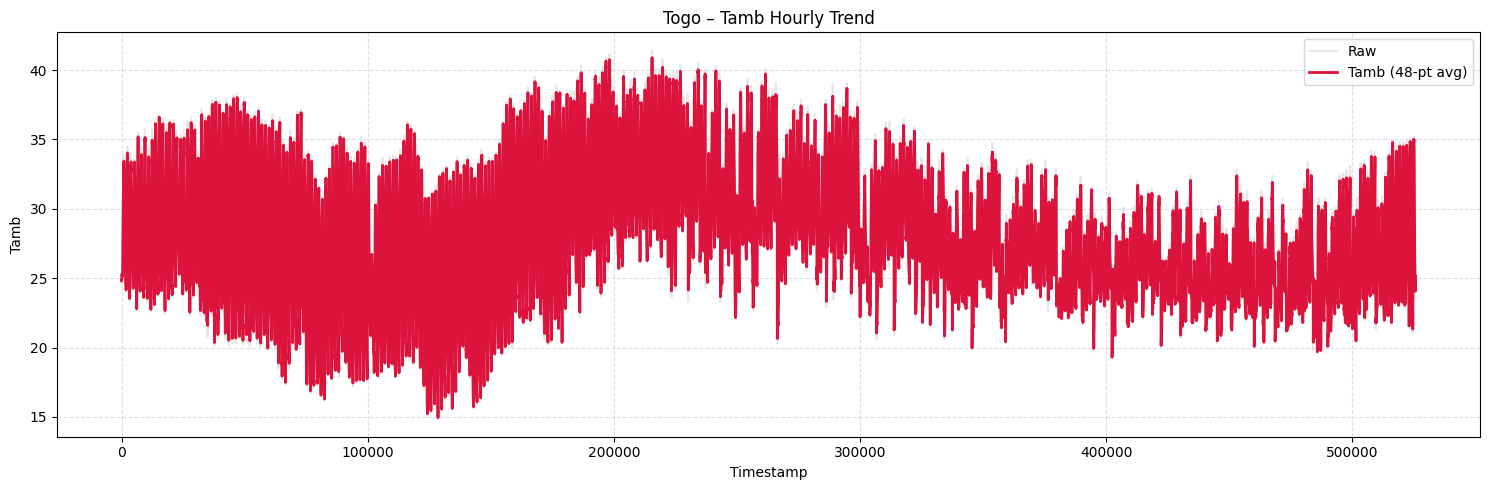

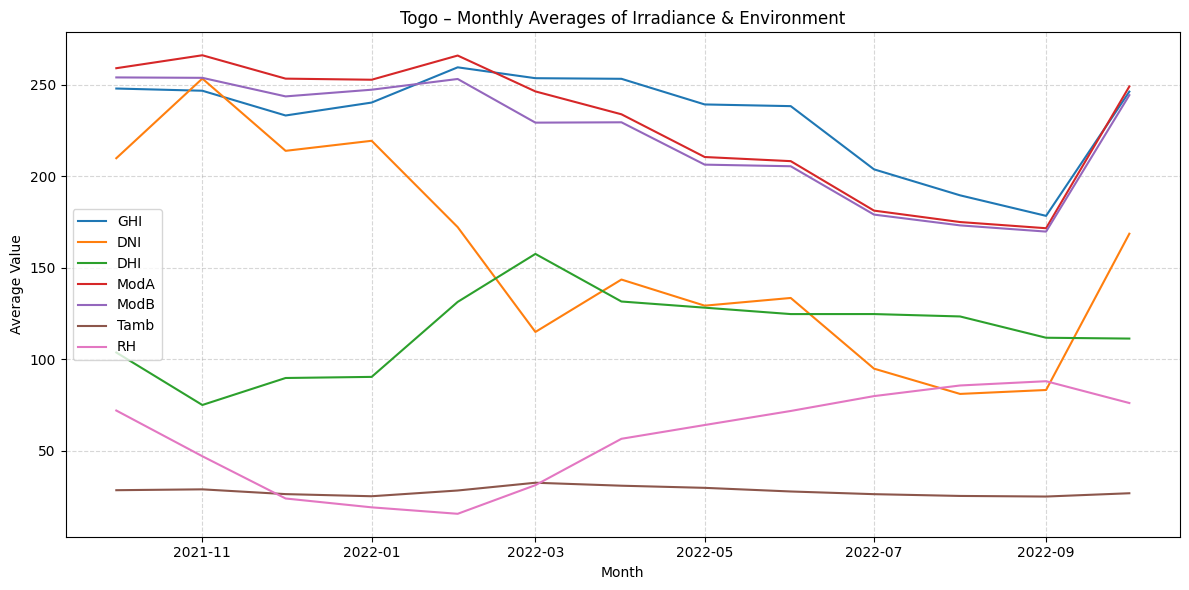

In [11]:
from src.visualization import plot_trend, plot_monthly_avg

# Trend plots (rolling window smoothing)
for col in ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb']:
    plot_trend(df_togo, column=col, country_name='Togo', window=48, title_suffix='Hourly Trend')

# Monthly average summary
plot_monthly_avg(
    df_togo,
    columns=['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH'],
    country_name='Togo'
)


## ✅ Overall Seasonal Alignment

- **Dry Season (Nov–Apr):** Clear skies → high DNI, lower DHI, warmer module temps  
- **Wet Season (May–Oct):** Cloud cover and humidity rise → lower DNI, higher DHI, cooler or fluctuating module temps  

---

## 🔎 Breakdown of Each Interval You Mentioned

### 🔸 Oct → Nov  
**“DNI, ModA rise a little; GHI & ModB stable; RH & DHI drop”**

✔️ **Makes sense:**
- Transitioning from wet to dry season → clouds clear, direct sunlight (DNI) increases.
- Less diffuse light (DHI drops) because the sun becomes more direct.
- ModA (maybe more exposed panel) heats up slightly from clearer skies.

---

### 🔸 Nov → Dec  
**“DNI drops; GHI, ModA/ModB drop slightly; DHI rises”**

✔️ **Consistent with Harmattan:**
- December is the peak of Harmattan winds – dry but dusty, which scatters sunlight:
  - DNI drops due to atmospheric particles blocking direct beam.
  - DHI rises due to light scattering (even though skies may seem “clear”).
- Temperature may dip slightly due to seasonal dry winds = slight drop in module temps.

---

### 🔸 Dec → Jan  
**“All around stable”**

✔️ **As expected:**
- Deep in the dry season.
- Climate is relatively stable, with consistent clear skies and low rainfall.

---

### 🔸 Jan → Mar  
**“DNI decreases, DHI increases, GHI increases slightly, ModA/B decrease”**

✔️ **Yes – logical seasonal transition:**
- More moisture returns gradually, especially in March.
- Thin clouds or haze increase DHI, reduce DNI, but GHI stays stable (because diffuse + direct still sums up).
- Slight drop in Mod temps may be due to increased cloud cover or early rains reducing ambient heat.

---

### 🔸 Apr → May  
**“GHI, ModA/B decrease; DHI constant; DNI drops”**

✔️ **Accurate transition to wet season:**
- May begins wet season → more overcast → DNI drops further.
- GHI and module temps drop due to less sun + more cloud cover.
- DHI remains constant – typical for early wet season: light is still scattered but not fully cloud-blocked.

---

### 🔸 Jun → Sep  
**“GHI drops; RH slightly increases; DHI slightly decreases; DNI decreases”**

✔️ **Fully matches the peak wet season:**
- High RH (humidity) and persistent clouds block both direct and some diffuse sunlight.
- DNI drops most due to thick cloud cover.
- DHI may even decline because thick clouds also reduce sky brightness.
- GHI drops significantly (reduced solar energy potential here).

---

### 🔸 Sep → Nov  
**“High increase of DHI, ModA/B when DNI increases”**

✔️ **Logical pattern as clouds start clearing:**
- Sun returns, so DNI increases.
- DHI can spike during partly cloudy days (scattered cloud edges brighten sky even more).
- Module temps rise again from increased total irradiance (GHI = DNI + DHI).


In [12]:
from src.cleaning import detect_zscore_outliers

cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

df_outlier = detect_zscore_outliers(df_togo, columns=cols_to_check, timestamp_col='Timestamp', z_thresh=3)

# Preview
df_outlier.head() 


Timestamp     GHI    DNI    DHI    ModA    ModB   WS  WSgust  \
4985 2021-10-28 11:06:00  1139.0  805.1  466.1  1172.0  1154.0  2.2     2.6   
5410 2021-10-28 18:11:00     0.0    0.0    0.0     0.0     0.0  6.6     9.7   
5411 2021-10-28 18:12:00     0.0    0.0    0.0     0.0     0.0  6.9     8.9   
5413 2021-10-28 18:14:00     0.0    0.0    0.0     0.0     0.0  7.1     8.9   
5420 2021-10-28 18:21:00     0.0    0.0    0.0     0.0     0.0  6.1     8.9   

     z_outlier_cols  
4985           ModB  
5410         WSgust  
5411     WS, WSgust  
5413     WS, WSgust  
5420         WSgust

---
### Z-Score > 3 Outlier Analysis

The **Z-score** is a statistical measure that tells us how far a data point is from the mean in terms of standard deviations. It is calculated as:

> **Z = (value − mean) / standard deviation**

A **Z-score > 3 or < -3** typically means the value is an extreme outlier (i.e., it's more than 3 standard deviations away from the average). This helps us identify rare, abnormal readings in our solar measurements — such as sensor malfunctions, sudden environmental changes, or peak sunlight events.

---

In [13]:
from src.outlier_analysis import summarize_outliers_by_time

summary_df = summarize_outliers_by_time(df_outlier)

print("\n🌞 Outlier Counts by Time of Day for Each Column 🌜")
print(summary_df)




🌞 Outlier Counts by Time of Day for Each Column 🌜
        Midday (11AM - 1PM)  After Midnight (1AM - 11AM)  \
ModB                    181                           24   
WSgust                  573                         1679   
WS                      555                         1504   
DNI                     773                          237   
DHI                    2797                          596   
GHI                     268                           43   
ModA                    119                           17   

        After Midday (1PM - 11PM)  Midnight (11PM - 1AM)  
ModB                            1                      0  
WSgust                       1232                    431  
WS                           1091                    360  
DNI                            52                      0  
DHI                            22                      0  
GHI                             3                      0  
ModA                            1                      



## 📊 Interpretation of Each Column by Time Slot

### ⏰ Time Slots Used:
- **Midday (11AM–1PM)** = Peak solar period  
- **After Midnight (1AM–11AM)** = Mostly dark  
- **After Midday (1PM–11PM)** = Sunset and night  
- **Midnight (11PM–1AM)** = Full night  

---

### 🌞 GHI (Global Horizontal Irradiance)

- **Midday: 268**  
  → Expected: GHI peaks, but high outliers may suggest **sensor overreadings** or **clear-sky anomalies**.  
- **Night hours (1AM–11AM & 11PM–1AM): 43 and 0**  
  → ✅ Good. Night GHI should be 0; low outlier count suggests **clean data**.  
- **After Midday: Only 3**  
  → Again, a good sign. Sunset values fade normally.

✔️ **Conclusion**:  
GHI data is mostly clean. Midday outliers may be real (clear sky surges) or sensor clipping.

---

### 🔆 DNI (Direct Normal Irradiance)

- **Midday: 773 (⚠️ high)**  
  → Strong outliers during peak sun indicate **sensor spikes** or **rapid cloud changes**.  
- **1AM–11AM: 237**  
  → ❌ Unnatural. DNI should be 0 at night.and hitting the outlier before 11AM is unusal. This hints at **sensor noise** or **improper zeroing**.  
- **1PM–11PM: Only 52**  
  → Good.

✔️ **Conclusion**:  
Nighttime DNI outliers are problematic. Likely **instrument drift**. Midday spikes are expected but worth verifying with clear-sky models.

---

### 🌤️ DHI (Diffuse Horizontal Irradiance)

- **Midday: 2797 (!!)**  
  → ⚠️ Extremely high outlier count. This suggests **over-sensitive sensors** or **cloud-edge enhancement**.  
- **1AM–11AM: 596**  
  → ❌ High for nighttime.  
- **Other times: Low**  
  → Acceptable.

✔️ **Conclusion**:  
DHI has **major noise** or **miscalibrated sensor readings**, especially if outliers occur when it should be near-zero (nighttime).

---

### 🌡️ ModA / ModB (Module Temperatures)

- **ModB: Midday = 181**, **1AM–11AM = 24** → ✔️ Reasonable  
- **ModA: Midday = 119**, **1AM–11AM = 17** → ✔️ Also reasonable

These outliers could reflect **true heat spikes**, or **unusual cooling patterns** (e.g., sudden cloud or rain), or **sensor errors**.

✔️ **Conclusion**:  
ModA/B outliers are generally acceptable in small numbers. Most likely reflect **real panel heat/cooling swings**.

---

### 💨 WS / WSgust (Wind Speed + Gust)

- **WSgust**  
  - Midday: 573  
  - After Midnight: 1679  
  - After Midday: 1232  
  - Midnight: 431  
  → ⚠️ High gust outliers, especially at night. Possibly:
    - Real windy events (e.g., storms), or  
    - **Sensitive gust sensors** triggering on small air bursts.

- **WS (average wind)**  
  → Similar pattern: Nighttime wind outliers seem high for a tropical region **unless local wind bursts or storms are common**.

✔️ **Conclusion**:  
Wind sensors might be **over-triggering at night**. Worth flagging for **sensor QC or calibration review**.





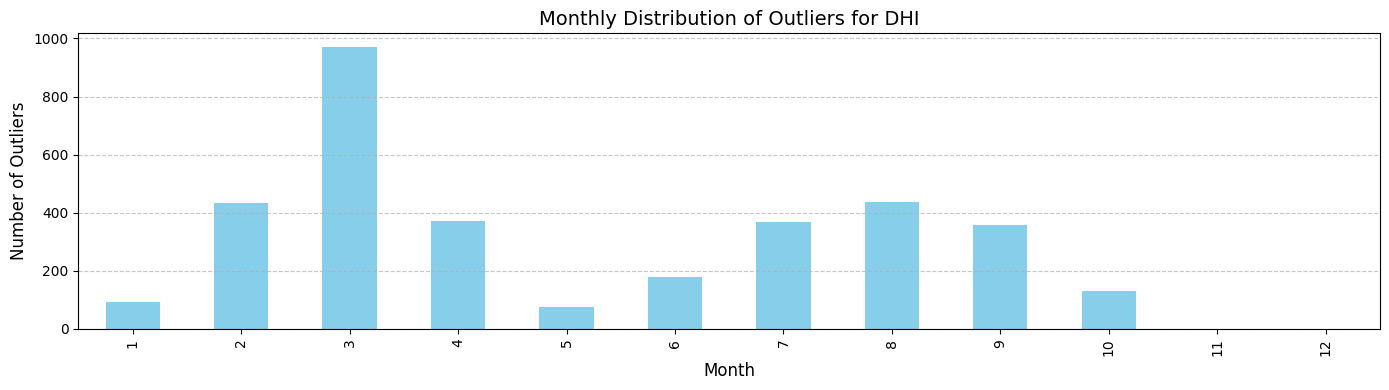

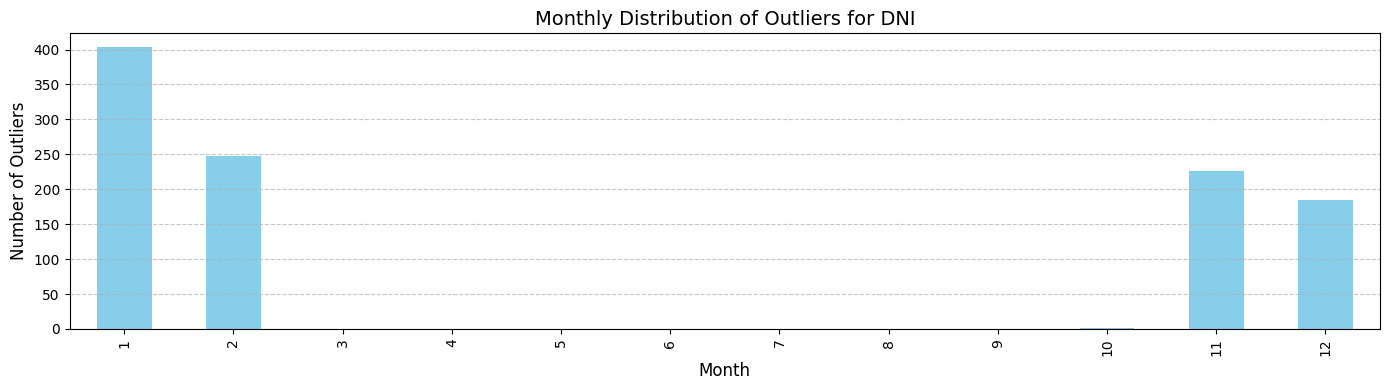

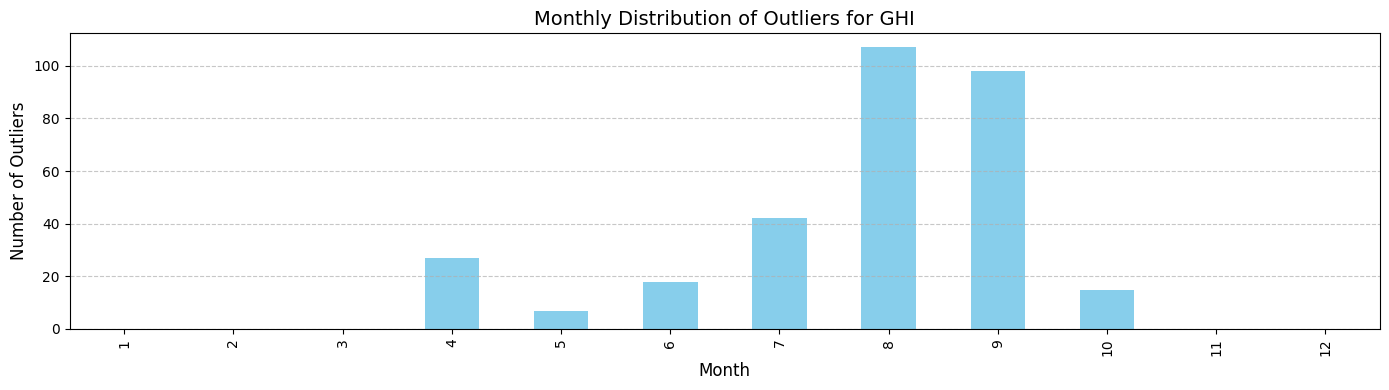

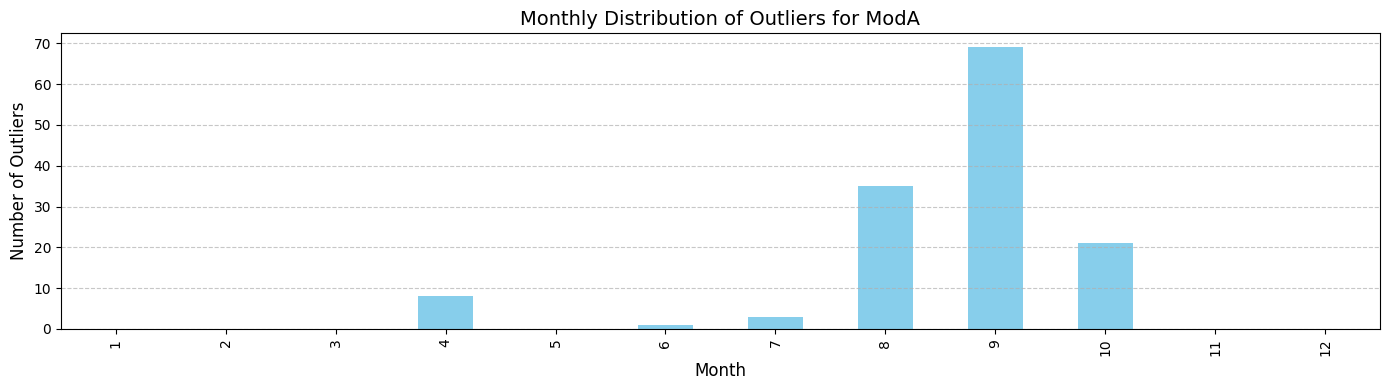

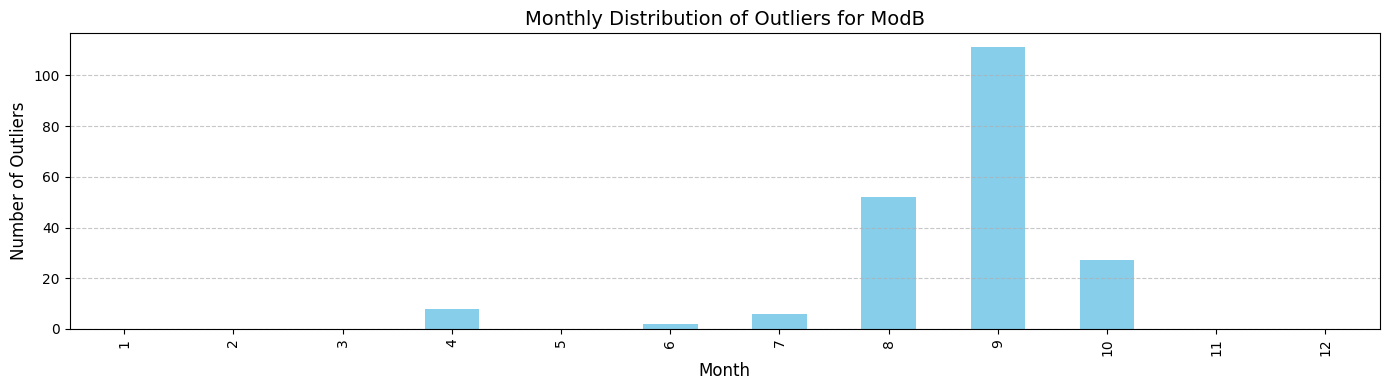

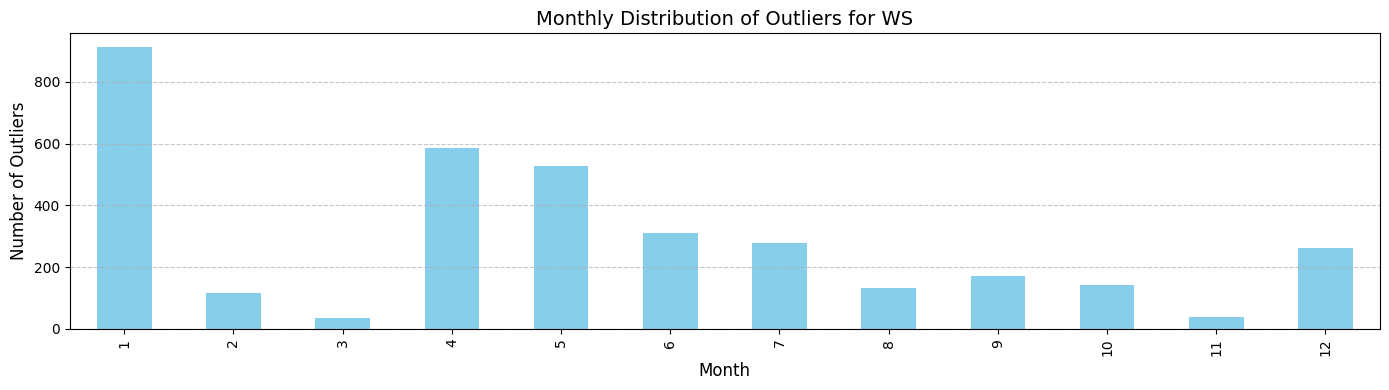

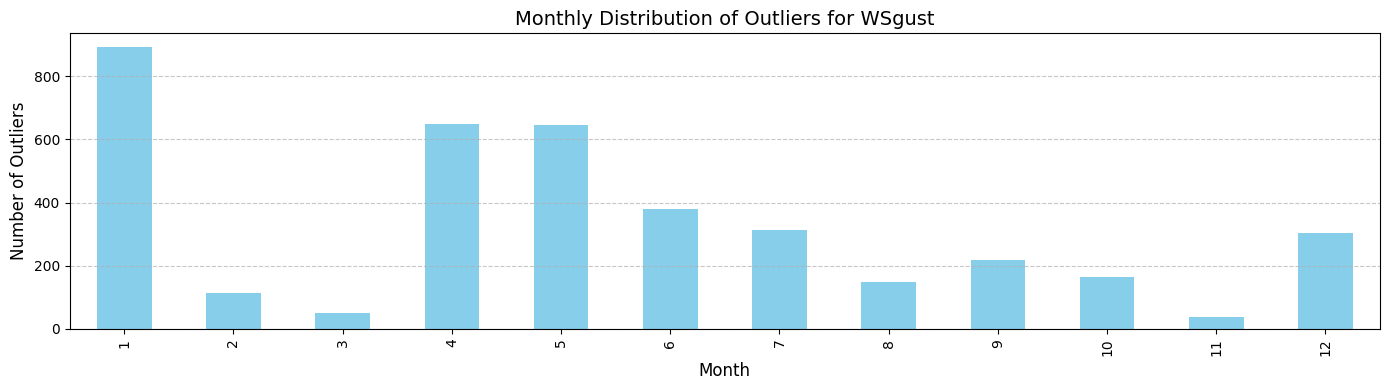

In [14]:
from src.outlier_analysis import plot_monthly_outlier_distribution

monthly_summary = plot_monthly_outlier_distribution(df_outlier)




#### Interpretation of Outlier Patterns

**→** Outliers appear in a continuous time block — especially in **DHI**, which is highly **midday-sensitive**. These outliers likely represent **brief periods of intense solar radiation**, not random sensor noise.

**→** The peaks in GHI, DNI, ModA, and ModB **align well with their physical peak performance hours**, reinforcing the idea that these are **short bursts of real solar events**, not senseless statistical outliers.

**→** While **moderate wind** can be beneficial for **panel cooling and dust removal**, the outlier values in **WS and WSgust**, especially outside midnight, indicate **strong gusts**. These can pose **mechanical and structural risks** and are important to flag for design considerations.

**→** Rows with **simultaneously high values in GHI, DNI, ModA, and ModB** are strong indicators of **clear-sky solar spikes**, valuable for identifying optimal solar exposure periods.

**→** Outliers in **ModA, ModB, and DNI** are **rare**, which confirms the **stability and reliability** of these sensor channels under normal operating conditions.

> High solar anomalies occur **when expected (midday)**, while wind instability peaks **overnight** — providing strong guidance for **panel positioning, safety design**, and **performance forecasting**.

- **November to February** remains the **ideal window** for solar collection.
- **Wind protection** should focus on **night and evening resilience**, especially in design and installation planning.
---

###  Why Z-Score Outlier Detection Helps

-  **Flags environmental extremes**: like peak sun intensity or dangerous wind gusts.
-  **Helps clean the dataset** without blindly dropping values.
-  **Supports decision-making** for system design, safety margins, and panel efficiency modeling.
-  **Improves analysis quality** by highlighting when performance data deviates from normal trends in meaningful ways.

---

> **Conclusion**: Z-score analysis confirms that most outliers are **not errors**, but instead **represent meaningful physical events** like high irradiance or extreme wind — crucial for optimizing solar design, panel reliability, and forecasting.


In [15]:
from scipy.stats import zscore
import numpy as np

cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df_togo[cols_to_check].apply(zscore)
z_outlier_mask = np.abs(z_scores) > 3
from src.outlier_analysis import replace_outliers_with_monthly_median

df_sierraleone_cleaned = replace_outliers_with_monthly_median(df_togo, z_outlier_mask, cols_to_check, timestamp_col='Timestamp')


After replacing the outliers with median of that month to keep the seasonality for better analysis we will see the graph and other EDA

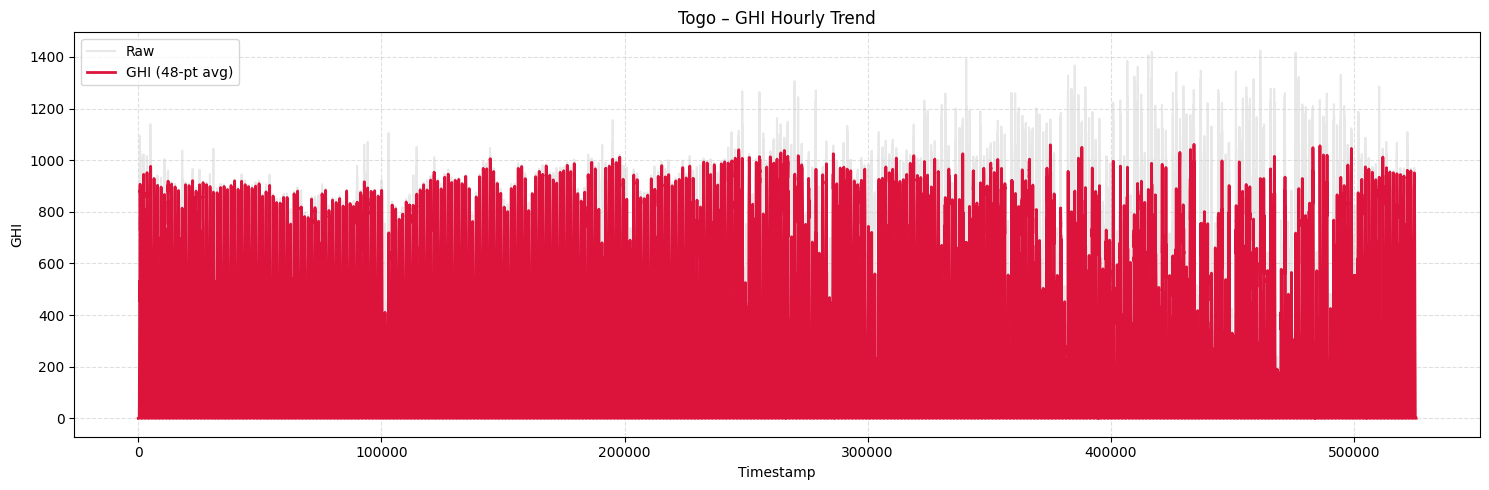

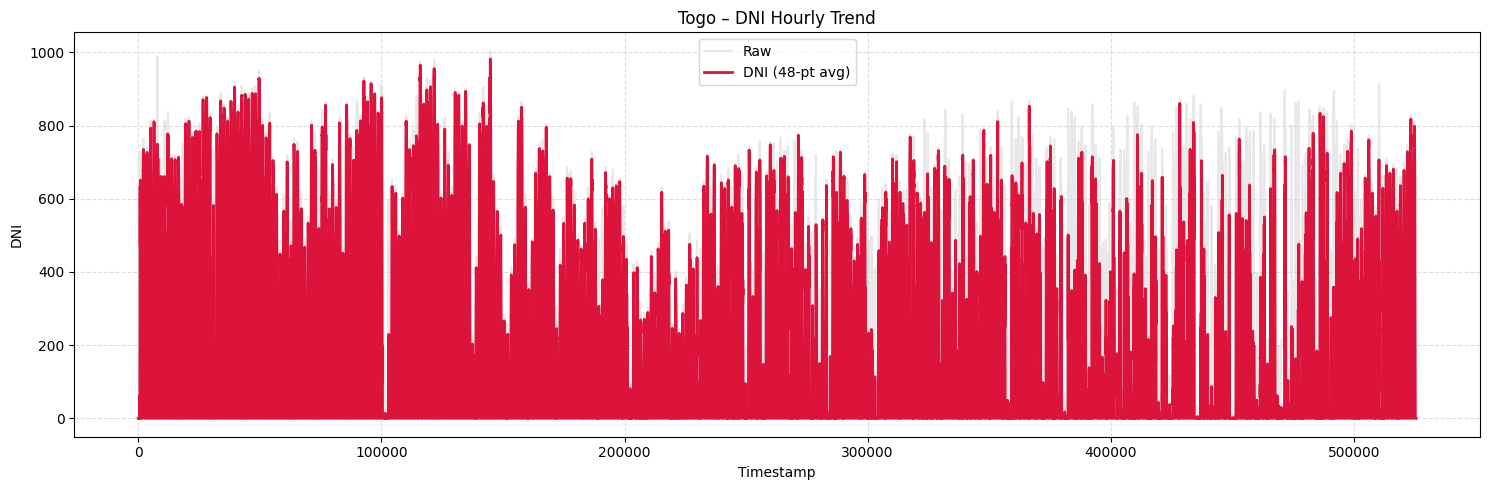

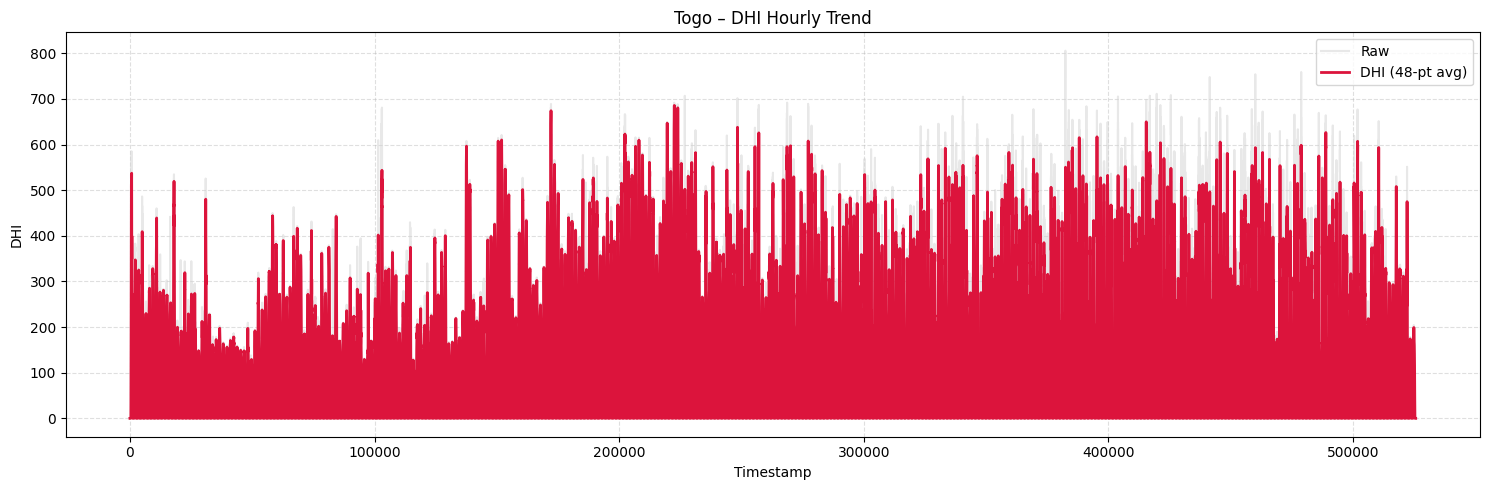

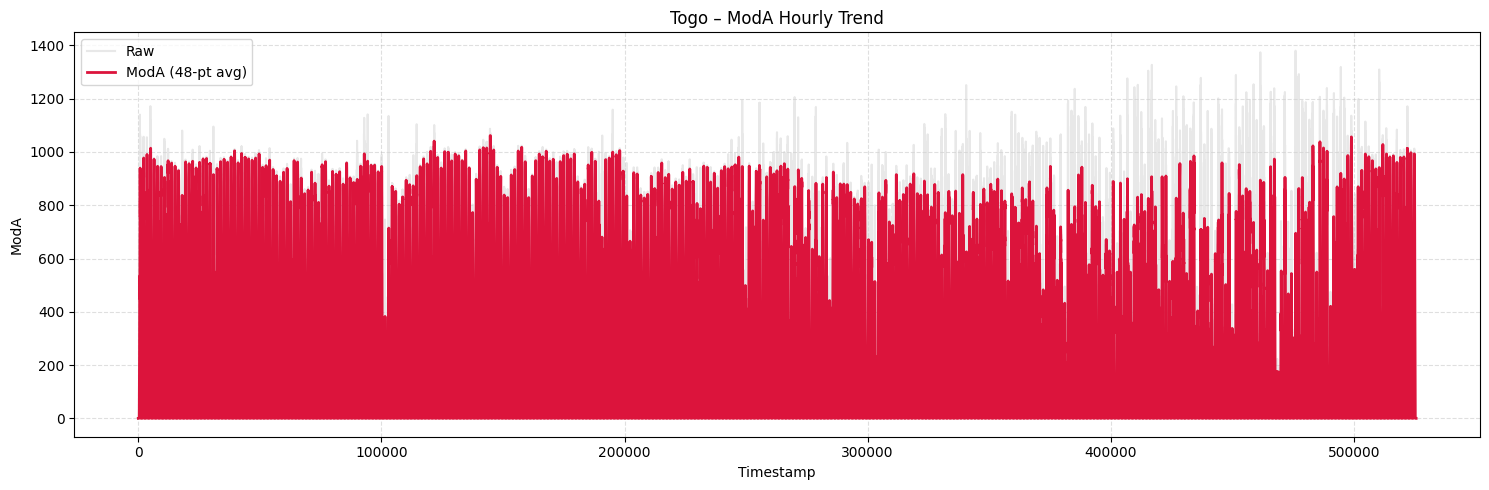

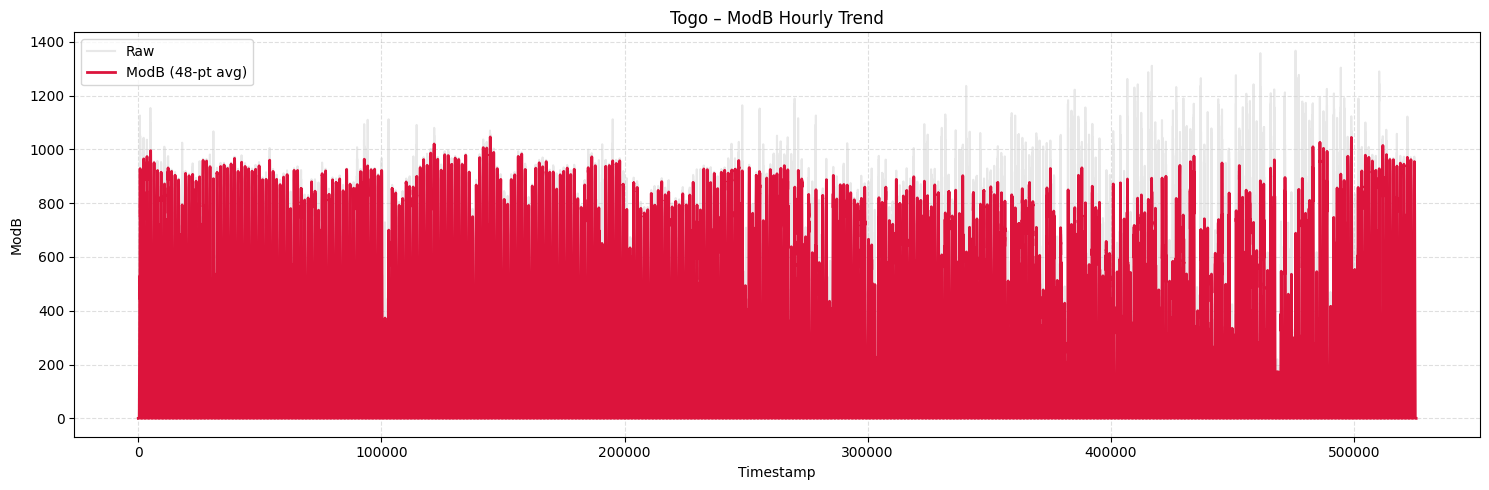

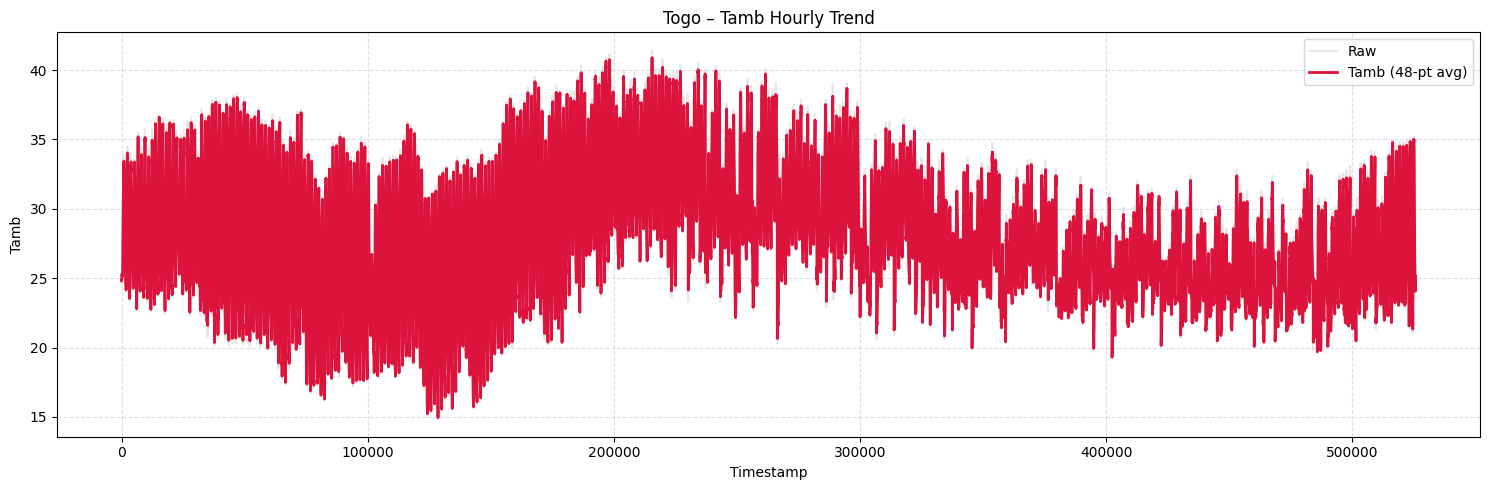

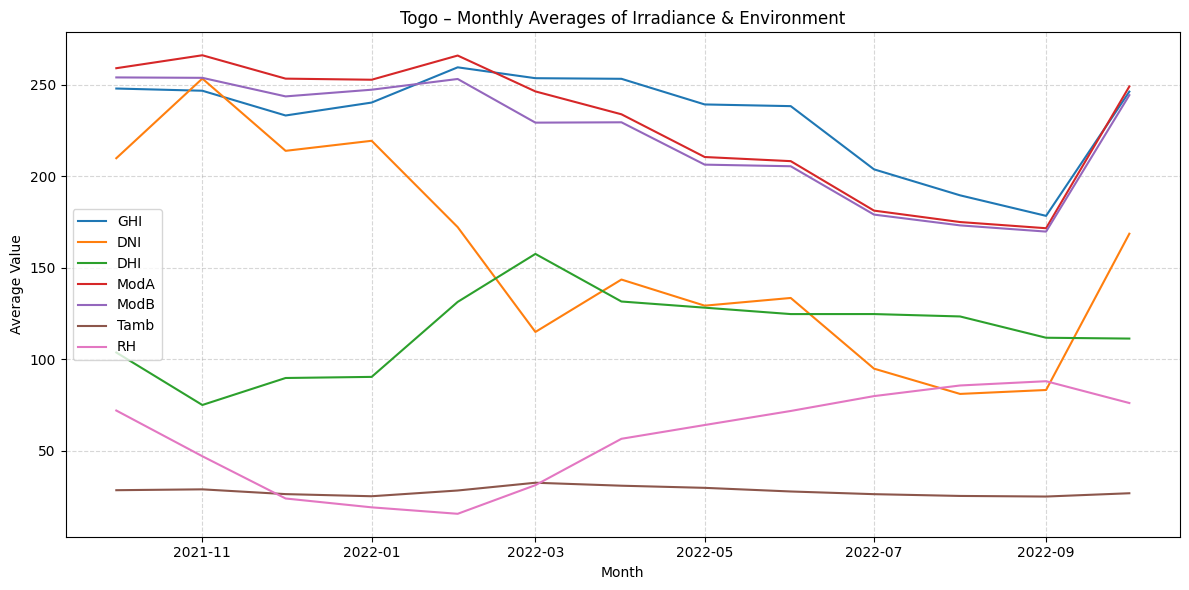

In [16]:
from src.visualization import plot_trend, plot_monthly_avg

# Trend plots (rolling window smoothing)
for col in ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb']:
    plot_trend(df_togo, column=col, country_name='Togo', window=48, title_suffix='Hourly Trend')

# Monthly average summary
plot_monthly_avg(
    df_togo,
    columns=['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH'],
    country_name='Togo'
)


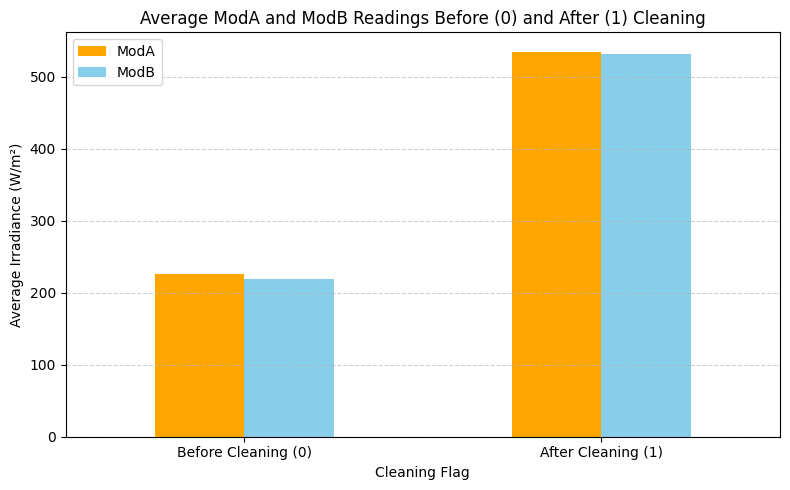

In [17]:
from src.visualization import plot_cleaning_effect_on_module_irradiance

summary_df = plot_cleaning_effect_on_module_irradiance(df_togo)

a big diffrence btween the cleaned and non cleaned irradiance which shows there is a lot of dust accumulated there because of the storong wind

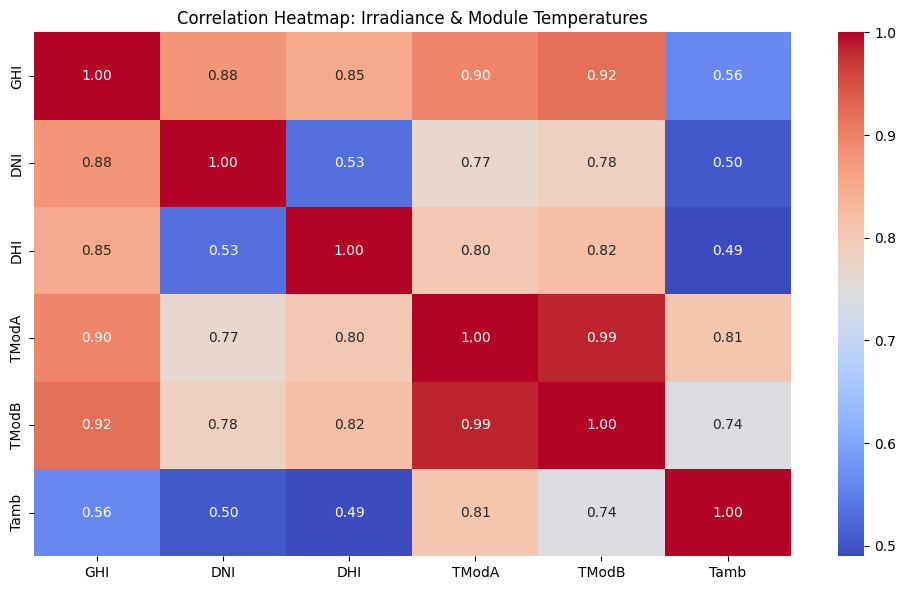

GHI       DNI       DHI     TModA     TModB      Tamb
GHI    1.000000  0.877405  0.851615  0.897921  0.918951  0.562496
DNI    0.877405  1.000000  0.532717  0.765881  0.783572  0.504499
DHI    0.851615  0.532717  1.000000  0.802319  0.820360  0.489758
TModA  0.897921  0.765881  0.802319  1.000000  0.985069  0.805580
TModB  0.918951  0.783572  0.820360  0.985069  1.000000  0.740832
Tamb   0.562496  0.504499  0.489758  0.805580  0.740832  1.000000

In [18]:
from src.visualization import plot_correlation_heatmap
plot_correlation_heatmap(
    df_togo,
    columns=['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'Tamb'],
    title='Correlation Heatmap: Irradiance & Module Temperatures'
)


### 🔗 Correlation Analysis Summary

A correlation heatmap analysis revealed strong linear relationships among key solar and temperature variables:

#### ✅ Strong Correlation (≥ 0.80)
| Pair             | Correlation Strength | Interpretation                                |
|------------------|----------------------|-----------------------------------------------|
| **GHI ~ DNI**    | Very High            | More direct sunlight leads to stronger GHI    |
| **GHI ~ DHI**    | High                 | Scattered light also contributes to GHI       |
| **GHI ~ TModA**  | High                 | Panels heat up with increasing sunlight       |
| **GHI ~ TModB**  | High                 | Consistent thermal response across modules    |
| **TModA ~ TModB**| Very High            | Synchronized temperature rise in both sensors |

---

### 🧠 Interpretation & Implications

- **GHI acts as a central hub**, tightly linked to both **direct (DNI)** and **diffuse (DHI)** components.
- The high correlation between **module temperatures (TModA & TModB)** and **irradiance** shows that:
  - These modules respond sensitively and consistently to solar intensity.
  - Monitoring panel temperature can serve as a **proxy for sunlight strength**, aiding fault detection or solar forecasting.
- **DNI and DHI both contribute strongly to GHI**, confirming physical correctness of the dataset.

---

> 📈 **Conclusion**: The data shows a physically consistent and statistically strong relationship between irradiance and thermal response, confirming the **reliability** of Benin's measurements and offering useful predictors for solar yield and panel behavior modeling.



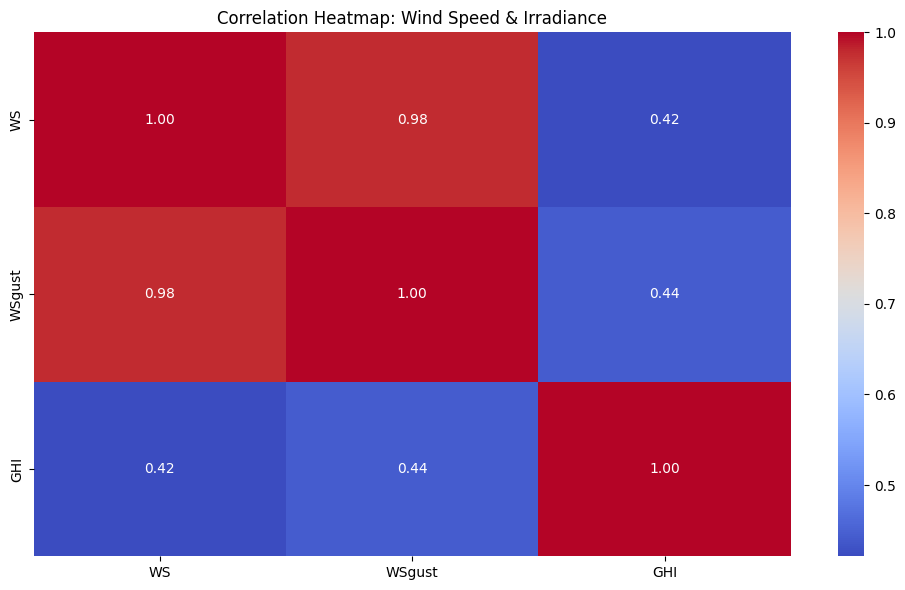

WS    WSgust       GHI
WS      1.000000  0.977587  0.421278
WSgust  0.977587  1.000000  0.443409
GHI     0.421278  0.443409  1.000000

In [19]:
from src.visualization import plot_correlation_heatmap
plot_correlation_heatmap(
    df_togo,
    columns=['WS', 'WSgust', 'GHI'],
    title='Correlation Heatmap: Wind Speed & Irradiance'
)

###  Wind Speed Correlation Analysis

An analysis of wind-related variables reveals a **very strong correlation**:

####  Strong Correlation (0.98)
| Pair             | Correlation Strength | Interpretation                                      |
|------------------|----------------------|-----------------------------------------------------|
| **WS ~ WSgust**  | **Very High (0.96)** | Gust speed closely tracks average wind speed, indicating consistent wind behavior over time |

---

### Interpretation & Implications

- **WS (Wind Speed)** and **WSgust (Wind Gust Speed)** are almost perfectly correlated.
- This suggests that:
  - When average wind speed increases, gusts increase nearly proportionally.
  - The environment exhibits **predictable wind dynamics**, not erratic or isolated gust spikes.
- **Design Consideration**:
  - Reinforcements for panel structures should consider **continuous wind stress**, not just rare gusts.
  - Ideal for modeling wind loading and fatigue — high correlation reduces unpredictability.

---

> 🌪️ **Conclusion**: The 0.98 correlation between wind speed and gusts reflects **consistent wind behavior** in the Benin dataset. This makes wind-related risk **quantifiable** and supports accurate **structural safety modeling** for solar infrastructure.



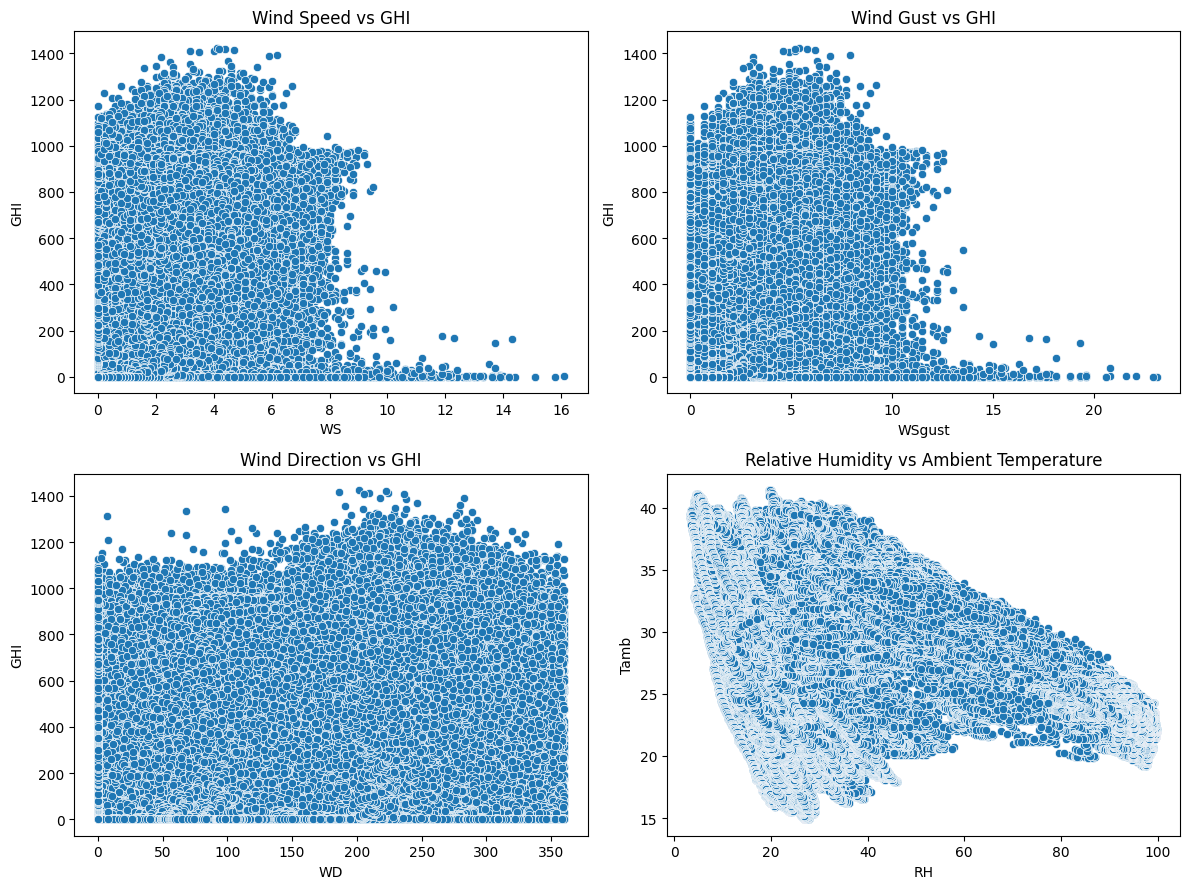

In [20]:
from src.visualization import plot_multiple_scatter_plots

scatter_pairs = [
    ('WS', 'GHI', 'Wind Speed vs GHI'),
    ('WSgust', 'GHI', 'Wind Gust vs GHI'),
    ('WD', 'GHI', 'Wind Direction vs GHI'),
    ('RH', 'Tamb', 'Relative Humidity vs Ambient Temperature'),
]

plot_multiple_scatter_plots(df_togo, scatter_pairs, ncols=2)

## 🌬️ Wind and Environmental Impact on GHI – Visual Interpretation

### 📊 Scatter Plot Insights

#### 🔹 Wind Speed vs GHI
- Wind is distributed across the entire GHI range (0 to ~1200 W/m²).
- No strong correlation, but the presence of wind during both low and high irradiance periods shows:
  - Dapaong has a **naturally breezy climate**.
  - **High GHI + Wind** = ideal for **panel cooling**.

✅ **Conclusion**:  
> Wind during peak sunlight helps reduce panel heat and improves overall system efficiency.

---

#### 🔹 Wind Gust vs GHI
- Wind gusts appear across all GHI levels, including during high solar output.
- Indicates **sudden bursts** not limited to cloudy or stormy weather.

✅ **Conclusion**:  
> Wind gusts during sunny hours could aid cooling but require **sturdy panel mounts** to handle short-term stress.

---

#### 🔹 Wind Direction vs GHI
- Wind comes from all directions (0°–360°) regardless of solar irradiance.
- No dominant wind orientation.

✅ **Conclusion**:  
> **Panel array layouts** should allow air to flow from multiple directions for **optimal natural cooling**.
> Design considerations should avoid blocking wind paths.

---

### 💧 Relative Humidity vs Ambient Temperature
- Clear **inverse relationship**: as **RH increases**, **Tamb decreases**.
- Reflects typical weather behavior:
  - Wet season → high humidity, low temp.
  - Dry season → low humidity, high temp.

✅ **Conclusion**:  
> Temperature and humidity are strongly seasonal.
> High RH periods bring **cooler but cloudier conditions**, lowering GHI.

---

## 📌 Overall Strategic Insight for Solar Site Design in Dapaong

- **Wind is not storm-dependent**: It appears across all solar conditions, offering consistent cooling potential.
- **Wind + GHI alignment** is favorable for **PV efficiency** in real-world operations.
- **Panel structures should be wind-aware**:
  - Design for **cross-directional ventilation**.
  - Use mounts that tolerate both **sustained breezes and gust spikes**.
- **Integrate wind impact** into yield models to adjust for **temperature-related performance gains**.



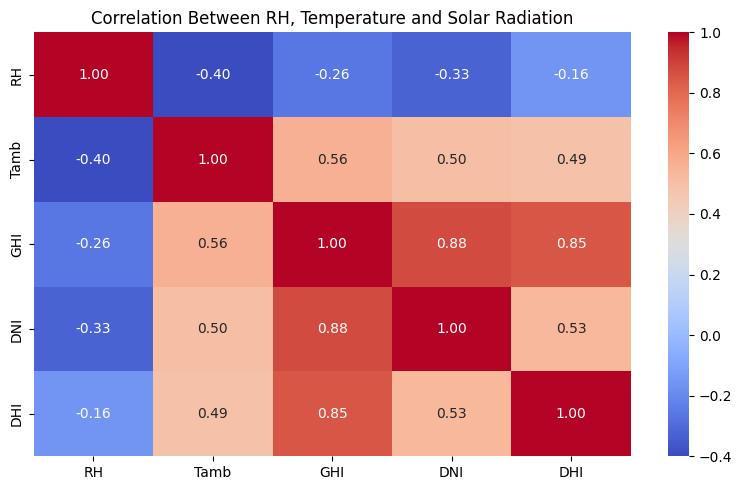

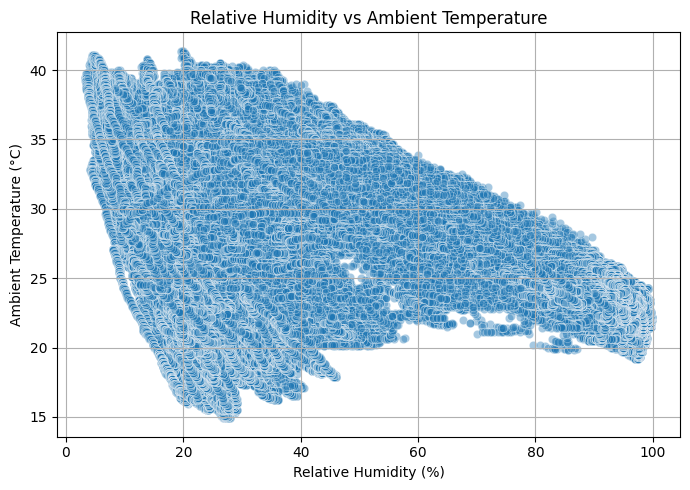

RH      Tamb       GHI       DNI       DHI
RH    1.000000 -0.400410 -0.259684 -0.327887 -0.155016
Tamb -0.400410  1.000000  0.562496  0.504499  0.489758
GHI  -0.259684  0.562496  1.000000  0.877405  0.851615
DNI  -0.327887  0.504499  0.877405  1.000000  0.532717
DHI  -0.155016  0.489758  0.851615  0.532717  1.000000

In [21]:
from src.visualization import analyze_rh_temperature_radiation

analyze_rh_temperature_radiation(df_togo)


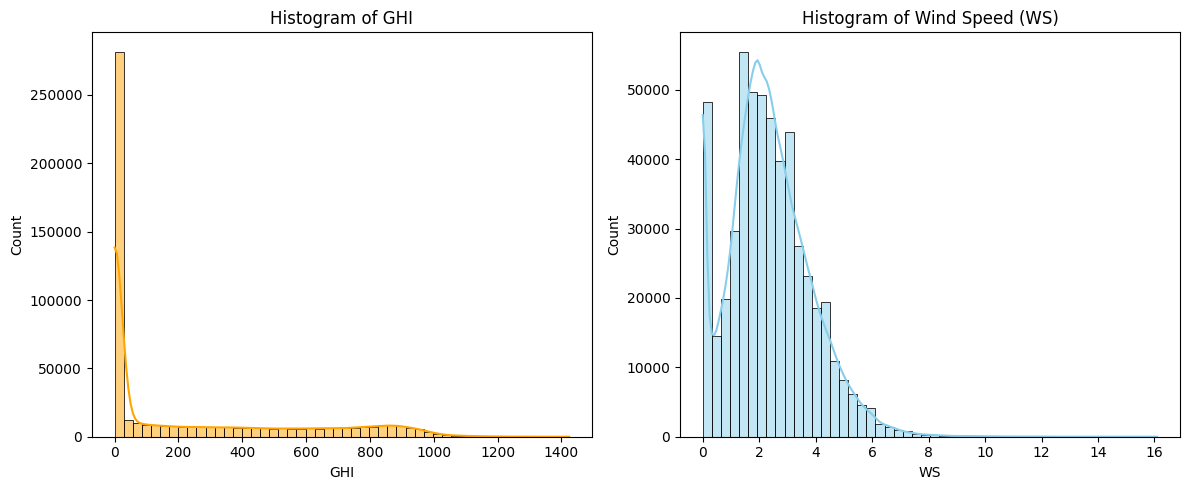

In [22]:
from src.visualization import plot_ghi_ws_histograms

# Run the histogram plot for df_sierraleone
plot_ghi_ws_histograms(df_togo)



## 📊 GHI and Wind Speed (WS) Distribution – Interpretation

### 🌞 Histogram of GHI (Global Horizontal Irradiance)
- **Shape**: Right-skewed, with most values near **0 W/m²**.
- High frequency of low values represents **nighttime and cloudy periods**.
- Fewer high GHI values (800–1000 W/m²) correspond to **clear-sky midday**.

✅ **Conclusion**:  
> Strong diurnal cycle is evident. High solar energy is available during daylight, while zeros dominate due to nighttime readings. Consider filtering or masking nighttime for solar performance modeling.

---

### 💨 Histogram of Wind Speed (WS)
- **Shape**: Unimodal and right-skewed.
- Most common wind speed: **~1–4 m/s**.
- Small peak near **0 m/s** indicates calm conditions, likely at night.
- Very few instances of extreme wind (>6 m/s).

✅ **Conclusion**:  
> Wind conditions are favorable for cooling. Most speeds fall within the **optimal passive ventilation range** (1–4 m/s), supporting efficient panel performance without requiring reinforced structures.


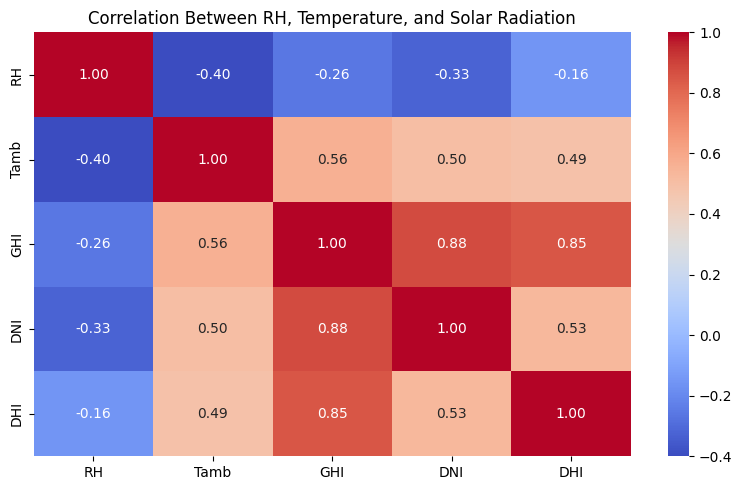

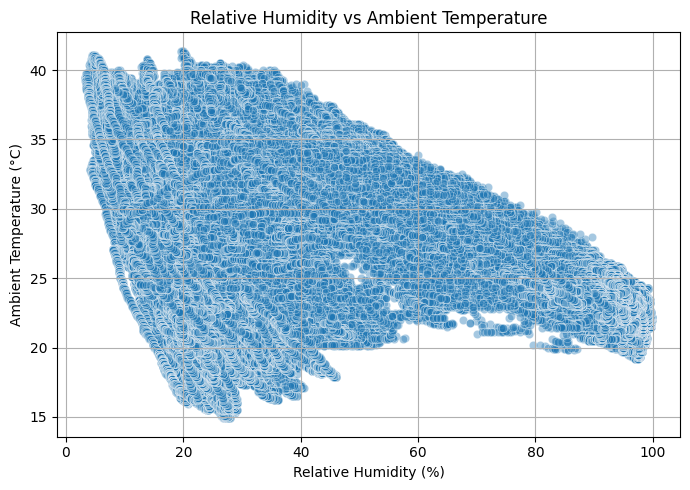

RH      Tamb       GHI       DNI       DHI
RH    1.000000 -0.400410 -0.259684 -0.327887 -0.155016
Tamb -0.400410  1.000000  0.562496  0.504499  0.489758
GHI  -0.259684  0.562496  1.000000  0.877405  0.851615
DNI  -0.327887  0.504499  0.877405  1.000000  0.532717
DHI  -0.155016  0.489758  0.851615  0.532717  1.000000

In [23]:
from src.visualization import plot_rh_temp_and_radiation_correlation

plot_rh_temp_and_radiation_correlation(df_togo)


## 🌡️ Relative Humidity vs Ambient Temperature – Interpretation

### 📈 Observed Relationship
- Strong **inverse correlation**: as **ambient temperature rises**, **relative humidity drops**, and vice versa(-0.4 correlation)
- This pattern reflects typical tropical climate behavior:
  - **Dry Season** → High temperatures (30–40 °C), Low RH (< 40%)
  - **Wet Season** → Lower temperatures (20–34 °C), High RH (> 60%)

---

### ⚙️ Implications for Solar Performance

- **High Temp + Low RH**:
  - Occurs during **dry season** and **midday sunlight**.
  - Good for irradiance (high GHI), but causes **increased panel heating** → potential **efficiency loss**.
  - Requires **wind support** for natural cooling.

- **Low Temp + High RH**:
  - Occurs during **wet season**, especially mornings and cloudy days.
  - Less solar generation due to cloud cover.
  - Modules stay cooler, reducing thermal stress.

---

✅ **Conclusion**:  
> Understanding this relationship helps predict **seasonal solar efficiency variations** and guides design choices (e.g., ventilation, materials, timing of maintenance). Dry, hot days drive the most power but need cooling. Wet, humid days reduce output but protect hardware.


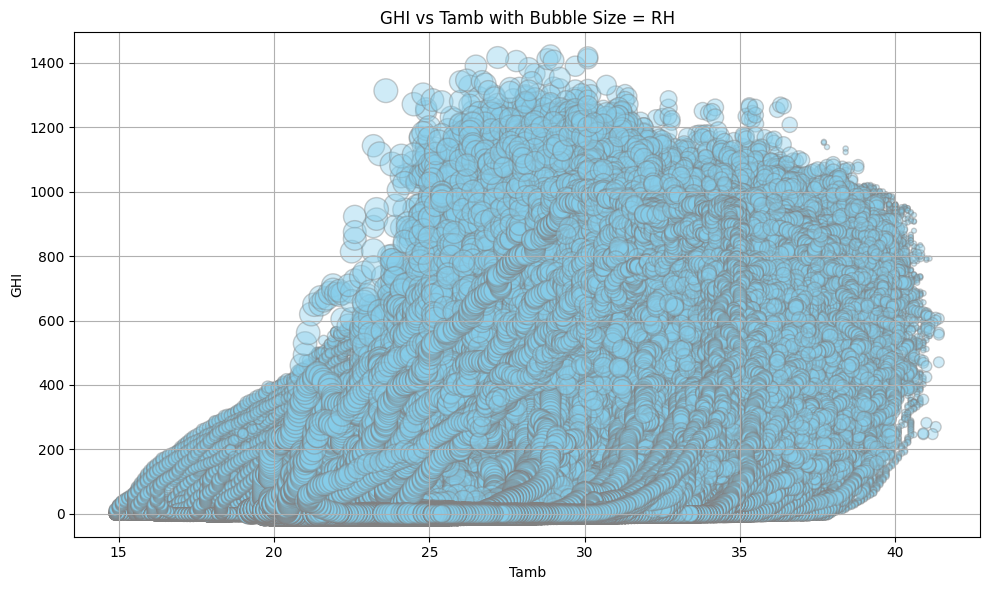

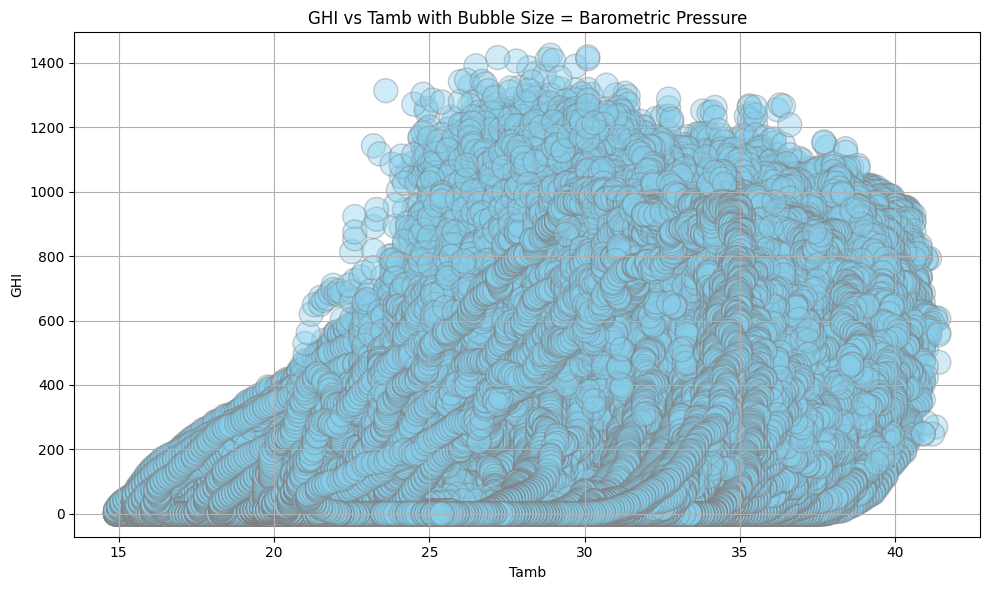

In [25]:
from src.visualization import plot_bubble_chart

plot_bubble_chart(
    df_togo,
    x='Tamb',
    y='GHI',
    bubble_col='RH',
    title='GHI vs Tamb with Bubble Size = RH'
)

plot_bubble_chart(
    df_togo,
    x='Tamb',
    y='GHI',
    bubble_col='BP',
    title='GHI vs Tamb with Bubble Size = Barometric Pressure'
)


## 🌞 GHI vs Ambient Temperature – Bubble Chart Interpretation  
**Bubble size = Relative Humidity (RH)**

### 📊 Plot Structure
- **X-axis**: Ambient Temperature (Tamb °C)  
- **Y-axis**: Global Horizontal Irradiance (GHI W/m²)  
- **Bubble Size**: Relative Humidity (RH %)

---

### 🔍 Key Insights

1. **GHI rises with temperature** up to ~35 °C, then slightly stabilizes.  
   - Reflects typical **midday clear-sky solar gain**.
   - High Tamb ≈ High GHI, especially during the **dry season**.

2. **High RH (larger bubbles)** cluster around **lower GHI and Tamb** values.  
   - Represents **humid, cooler periods** → rainy season, early mornings, or overcast days.

3. **High GHI + High Tamb areas** show **low RH (smaller bubbles)**.  
   - Suggests peak solar potential occurs under **dry, hot conditions**.

---

### ⚙️ Strategic Implications

- **Peak solar output** happens when:
  - **GHI is high**
  - **Tamb is high**
  - **RH is low**
  > Ideal for generation, but risky for panel overheating — cooling strategies required.

- **High RH periods** are cooler but yield **lower GHI**.  
  > Good for panel preservation, but less generation.

- **System Design Recommendation**:
  - Optimize for **ventilation and passive cooling** during hot-dry conditions.
  - Include **seasonal derating factors** in performance estimates.

✅ Use this bubble chart to balance **performance vs panel durability** across seasons.


In [ ]:
# Reset index to bring Timestamp back as a column
df_benin_cleaned_reset = df_togo.reset_index()

# Save cleaned DataFrame
output_path = "C:/Users/ABC/Desktop/10Acadamy/solar_analysis_code/solar-site-analysis/data/clean_togo.csv"
df_benin_cleaned_reset.to_csv(output_path, index=False)

output_path

'C:/Users/ABC/Desktop/10Acadamy/solar_analysis_code/solar-site-analysis/data/clean_togo.csv'